# import

In [2]:
import numpy as np
import pandas as pd
from os.path import join as pjoin
from scipy.stats.stats import sem
from matplotlib import pyplot as plt
from cxy_visual_dev.lib.predefine import dataset_name2info,\
    get_parcel2label_by_ColeName, proj_dir

anal_dir = pjoin(proj_dir, 'analysis')
work_dir = pjoin(anal_dir, 'plot/plot_dev_line')

# define

## plot_LR_same_axis

In [2]:
def plot_LR_same_axis(data_file, info_file, rois, ylabel, n_row, n_col,
                      figsize=None, out_file=None):
    """
    把同一个ROI的左右脑曲线画到同一个axis里
    """

    # inputs
    Hemis = ('L', 'R')

    # load
    df = pd.read_csv(data_file)
    info_df = pd.read_csv(info_file)
    age_name = 'age in years'
    ages = np.array(info_df[age_name])
    age_uniq = np.unique(ages)

    rois_without_hemi = ['_'.join(i.split('_')[1:]) for i in rois]
    rois_uniq = np.unique(rois_without_hemi)
    max_row_idx = int((len(rois_uniq)-1) / n_col)
    _, axes = plt.subplots(n_row, n_col, figsize=figsize)
    if n_row == 1 and n_col == 1:
        axes = np.array([[axes]])
    elif axes.shape != (n_row, n_col):
        axes = axes.reshape((n_row, n_col))
    for i, roi_without_hemi in enumerate(rois_uniq):
        row_idx = int(i / n_col)
        col_idx = i % n_col
        ax = axes[row_idx, col_idx]
        for Hemi in Hemis:
            roi = f'{Hemi}_{roi_without_hemi}'
            if roi not in rois:
                continue
            meas_vec = np.array(df[roi])
            ys = []
            yerrs = []
            for age in age_uniq:
                meas_tmp = meas_vec[ages == age]
                ys.append(np.mean(meas_tmp))
                yerrs.append(sem(meas_tmp))
            ax.errorbar(age_uniq, ys, yerrs, label=roi)
        if col_idx == 0:
            ax.set_ylabel(ylabel)
        if row_idx == max_row_idx:
            ax.set_xlabel(age_name)
        ax.legend()
    plt.tight_layout()
    if out_file is None:
        plt.show()
    else:
        plt.savefig(out_file)

## plot_column

In [3]:
def plot_column(data_file, info_file, columns, age_name, n_row, n_col,
                ylabel=None, title=None, figsize=None, legend=True,
                out_file=None):
    """
    为指定的DataFrame的column分别画一个axis
    """
    if isinstance(data_file, str):
        df = pd.read_csv(data_file)
    elif isinstance(data_file, list):
        df1s = []
        for f1 in data_file:
            # 纵向连接所有f1
            if isinstance(f1, str):
                df1s.append(pd.read_csv(f1))
            elif isinstance(f1, list):
                df2s = []
                for f2 in f1:
                    # 横向连接所有f2
                    df2s.append(pd.read_csv(f2))
                df1s.append(
                    pd.concat(df2s, axis='columns', join='outer', ignore_index=False)
                )
            else:
                raise TypeError(2)
        df = pd.concat(df1s, axis='index', join='outer', ignore_index=True)
    else:
        raise TypeError(1)
    
    if isinstance(info_file, str):
        info_df = pd.read_csv(info_file)
    elif isinstance(info_file, list):
        df1s = []
        for f1 in info_file:
            # 纵向连接所有f1
            df1s.append(pd.read_csv(f1))
        info_df = pd.concat(df1s, axis='index', join='outer', ignore_index=True)
    else:
        raise TypeError(3)

    if columns == 'all':
        columns = df.columns
    ages = np.array(info_df[age_name])
    age_uniq = np.unique(ages)

    _, axes = plt.subplots(n_row, n_col, figsize=figsize)
    if n_row == 1 and n_col == 1:
        axes = np.array([[axes]])
    elif axes.shape != (n_row, n_col):
        axes = axes.reshape((n_row, n_col))
    max_row_idx = int((len(columns)-1) / n_col)
    for i, col in enumerate(columns):
        row_idx = int(i / n_col)
        col_idx = i % n_col
        ax = axes[row_idx, col_idx]
        meas_vec = np.array(df[col])
        ys = []
        yerrs = []
        for age in age_uniq:
            meas_tmp = meas_vec[ages == age]
            ys.append(np.mean(meas_tmp))
            yerrs.append(sem(meas_tmp))
        ax.errorbar(age_uniq, ys, yerrs, label=col)
        if col_idx == 0 and ylabel is not None:
            ax.set_ylabel(ylabel)
        if row_idx == max_row_idx:
            ax.set_xlabel(age_name)
        if row_idx == 0 and title is not None:
            ax.set_title(title)
        if legend:
            ax.legend()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    plt.tight_layout()
    if out_file is None:
        plt.show()
    else:
        plt.savefig(out_file)

## plot_column_by_index

In [3]:
def plot_column_by_index(data_file, columns, n_row, n_col, ylabel=None,
                         title=None, figsize=None, legend=True, out_file=None):
    """
    index就是年龄
    """
    if isinstance(data_file, str):
        df = pd.read_csv(data_file, index_col=0)
    elif isinstance(data_file, list):
        df1s = []
        for f1 in data_file:
            # 纵向连接所有f1
            if isinstance(f1, str):
                df1s.append(pd.read_csv(f1, index_col=0))
            elif isinstance(f1, list):
                df2s = []
                for f2 in f1:
                    # 横向连接所有f2
                    df2s.append(pd.read_csv(f2, index_col=0))
                df1s.append(
                    pd.concat(df2s, axis='columns', join='outer', ignore_index=False)
                )
            else:
                raise TypeError(2)
        df = pd.concat(df1s, axis='index', join='outer', ignore_index=False)
    else:
        raise TypeError(1)

    if columns == 'all':
        columns = df.columns
    ages = np.array(df.index)

    _, axes = plt.subplots(n_row, n_col, figsize=figsize)
    if n_row == 1 and n_col == 1:
        axes = np.array([[axes]])
    elif axes.shape != (n_row, n_col):
        axes = axes.reshape((n_row, n_col))
    max_row_idx = int((len(columns)-1) / n_col)
    for i, col in enumerate(columns):
        row_idx = int(i / n_col)
        col_idx = i % n_col
        ax = axes[row_idx, col_idx]
        meas_vec = np.array(df[col])
        ax.errorbar(ages, meas_vec, label=col)
        if col_idx == 0 and ylabel is not None:
            ax.set_ylabel(ylabel)
        if row_idx == max_row_idx:
            ax.set_xlabel('age in years')
        if row_idx == 0 and title is not None:
            ax.set_title(title)
        if legend:
            ax.legend()
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
    plt.tight_layout()
    if out_file is None:
        plt.show()
    else:
        plt.savefig(out_file)

# plot_LR_same_axis

## Cole_visual_ROI

In [3]:
net_names = ['Primary Visual', 'Secondary Visual',
             'Posterior Multimodal', 'Ventral Multimodal']
rois = list(get_parcel2label_by_ColeName(net_names).keys())

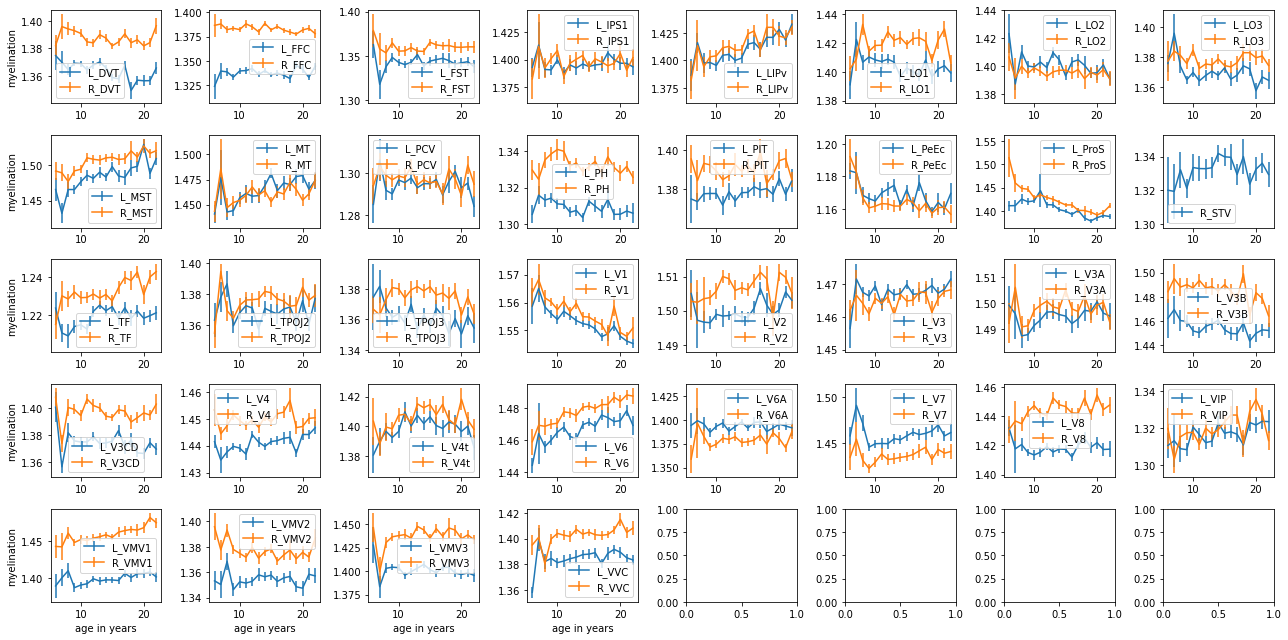

In [4]:
plot_LR_same_axis(
    data_file=pjoin(anal_dir, 'structure/HCPD_myelin_HCP_MMP1.csv'),
    info_file=dataset_name2info['HCPD'], rois=rois,
    ylabel='myelination', n_row=5, n_col=8, figsize=(18, 9),
    # out_file=pjoin(work_dir, 'HCPD_myelin_Cole_visual_ROI.jpg')
)

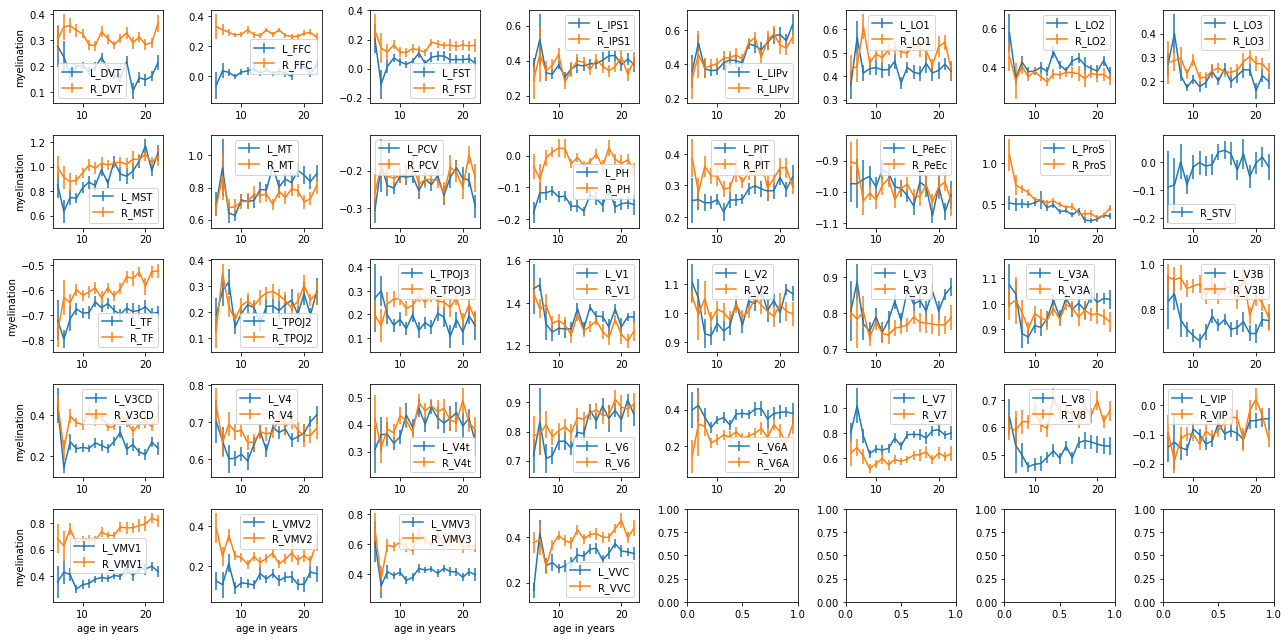

In [5]:
plot_LR_same_axis(
    data_file=pjoin(anal_dir, 'structure/HCPD_myelin_HCP_MMP1_zscore.csv'),
    info_file=dataset_name2info['HCPD'], rois=rois,
    ylabel='myelination', n_row=5, n_col=8, figsize=(18, 9),
    # out_file=pjoin(work_dir, 'HCPD_myelin_Cole_visual_ROI_zscore.jpg')
)

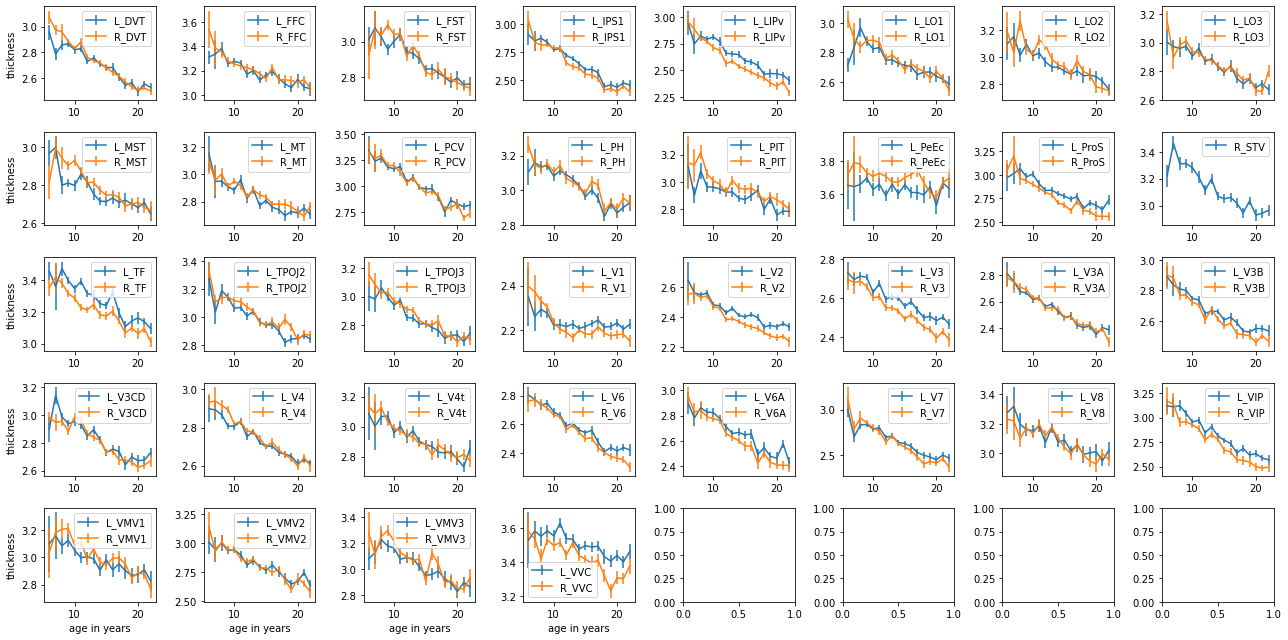

In [6]:
plot_LR_same_axis(
    data_file=pjoin(anal_dir, 'structure/HCPD_thickness_HCP_MMP1.csv'),
    info_file=dataset_name2info['HCPD'], rois=rois,
    ylabel='thickness', n_row=5, n_col=8, figsize=(18, 9),
    # out_file=pjoin(work_dir, 'HCPD_thickness_Cole_visual_ROI.jpg')
)

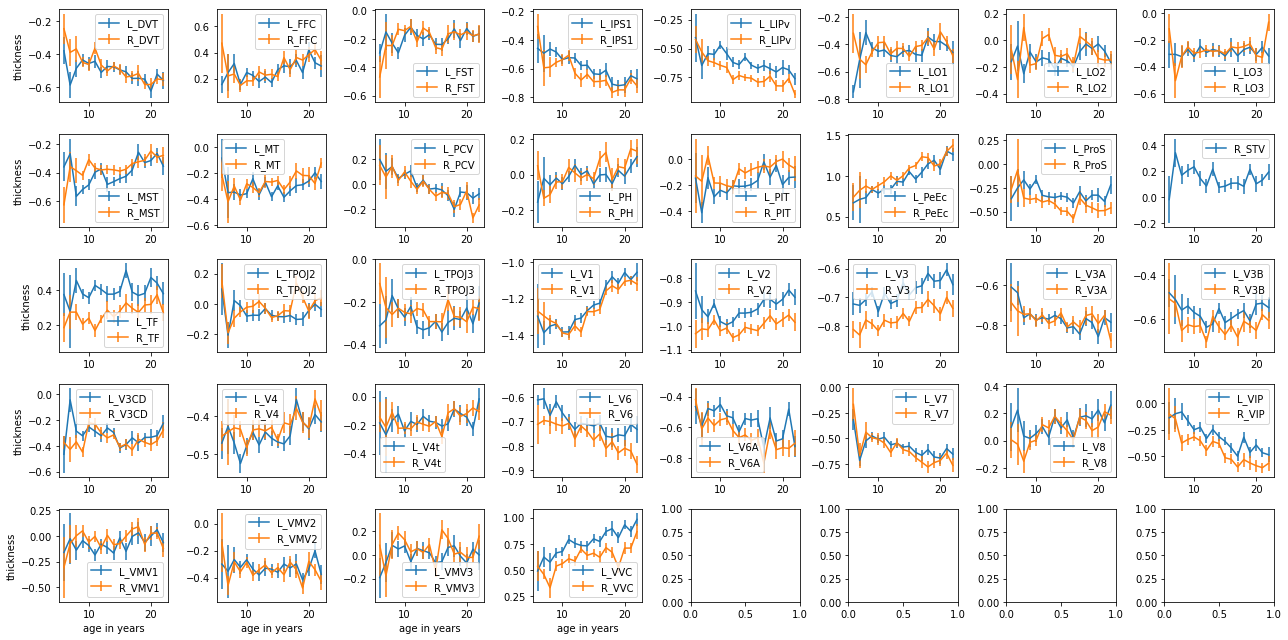

In [7]:
plot_LR_same_axis(
    data_file=pjoin(anal_dir, 'structure/HCPD_thickness_HCP_MMP1_zscore.csv'),
    info_file=dataset_name2info['HCPD'], rois=rois,
    ylabel='thickness', n_row=5, n_col=8, figsize=(18, 9),
    # out_file=pjoin(work_dir, 'HCPD_thickness_Cole_visual_ROI_zscore.jpg')
)

## LR

In [8]:
rois = ('L_cortex', 'R_cortex')

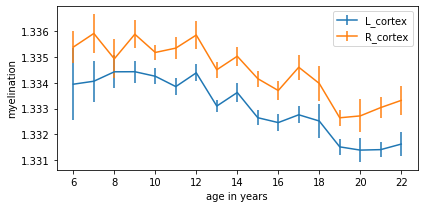

In [9]:
plot_LR_same_axis(
    data_file=pjoin(anal_dir, 'structure/HCPD_myelin_LR.csv'),
    info_file=dataset_name2info['HCPD'], rois=rois,
    ylabel='myelination', n_row=1, n_col=1, figsize=(6, 3),
    # out_file=pjoin(work_dir, 'HCPD_myelin_LR.jpg')
)

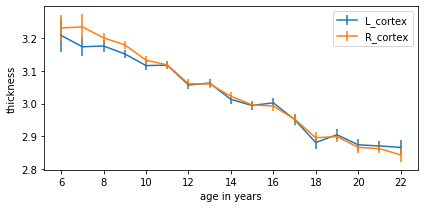

In [10]:
plot_LR_same_axis(
    data_file=pjoin(anal_dir, 'structure/HCPD_thickness_LR.csv'),
    info_file=dataset_name2info['HCPD'], rois=rois,
    ylabel='thickness', n_row=1, n_col=1, figsize=(6, 3),
    # out_file=pjoin(work_dir, 'HCPD_thickness_LR.jpg')
)

## Cole_visual_LR

In [11]:
rois = ('L_cole_visual', 'R_cole_visual')

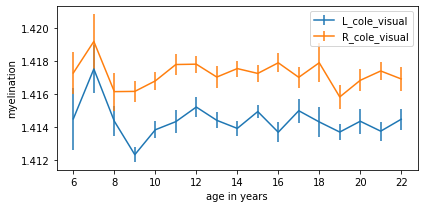

In [12]:
plot_LR_same_axis(
    data_file=pjoin(anal_dir, 'structure/HCPD_myelin_Cole_visual_LR.csv'),
    info_file=dataset_name2info['HCPD'], rois=rois,
    ylabel='myelination', n_row=1, n_col=1, figsize=(6, 3),
    # out_file=pjoin(work_dir, 'HCPD_myelin_Cole_visual_LR.jpg')
)

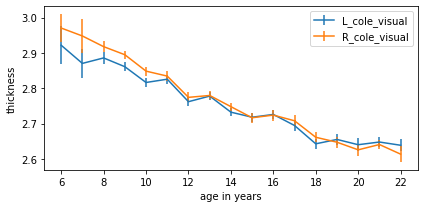

In [13]:
plot_LR_same_axis(
    data_file=pjoin(anal_dir, 'structure/HCPD_thickness_Cole_visual_LR.csv'),
    info_file=dataset_name2info['HCPD'], rois=rois,
    ylabel='thickness', n_row=1, n_col=1, figsize=(6, 3),
    # out_file=pjoin(work_dir, 'HCPD_thickness_Cole_visual_LR.jpg')
)

# plot_column

## PCA components

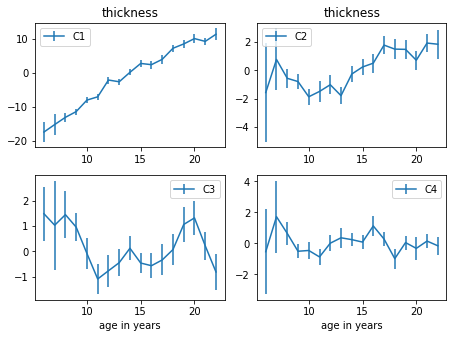

In [3]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPD_thickness_4mm_R_cole_visual_PCA-vtx.csv'),
    info_file=dataset_name2info['HCPD'],
    columns=['C1', 'C2', 'C3', 'C4'], age_name='age in years',
    n_row=2, n_col=2, title='thickness', figsize=(6.4, 4.8),
    out_file=pjoin(work_dir, 'HCPD_thickness_4mm_R_cole_visual_PCA-vtx_age-year.jpg')
)

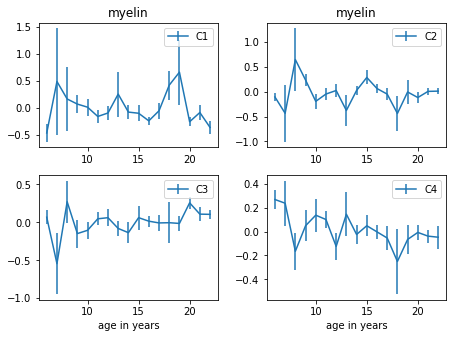

In [4]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPD_myelin_4mm_R_cole_visual_PCA-vtx.csv'),
    info_file=dataset_name2info['HCPD'],
    columns=['C1', 'C2', 'C3', 'C4'], age_name='age in years',
    n_row=2, n_col=2, title='myelin', figsize=(6.4, 4.8),
    out_file=pjoin(work_dir, 'HCPD_myelin_4mm_R_cole_visual_PCA-vtx_age-year.jpg')
)

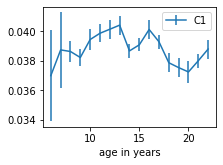

In [5]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPD_thickness_4mm_R_cole_visual_PCA-subj.csv'),
    info_file=dataset_name2info['HCPD'],
    columns=['C1'], age_name='age in years',
    n_row=1, n_col=1, title='thickness', figsize=(3.2, 2.4),
    out_file=pjoin(work_dir, 'HCPD_thickness_4mm_R_cole_visual_PCA-subj_age-year.jpg')
)

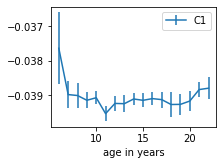

In [6]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPD_myelin_4mm_R_cole_visual_PCA-subj.csv'),
    info_file=dataset_name2info['HCPD'],
    columns=['C1'], age_name='age in years',
    n_row=1, n_col=1, title='myelin', figsize=(3.2, 2.4),
    out_file=pjoin(work_dir, 'HCPD_myelin_4mm_R_cole_visual_PCA-subj_age-year.jpg')
)

## R_cole_visual_ROI

In [3]:
net_names = ['Primary Visual', 'Secondary Visual',
             'Posterior Multimodal', 'Ventral Multimodal']
rois = list(get_parcel2label_by_ColeName(net_names).keys())
rois = [roi for roi in rois if roi.startswith('R_')]

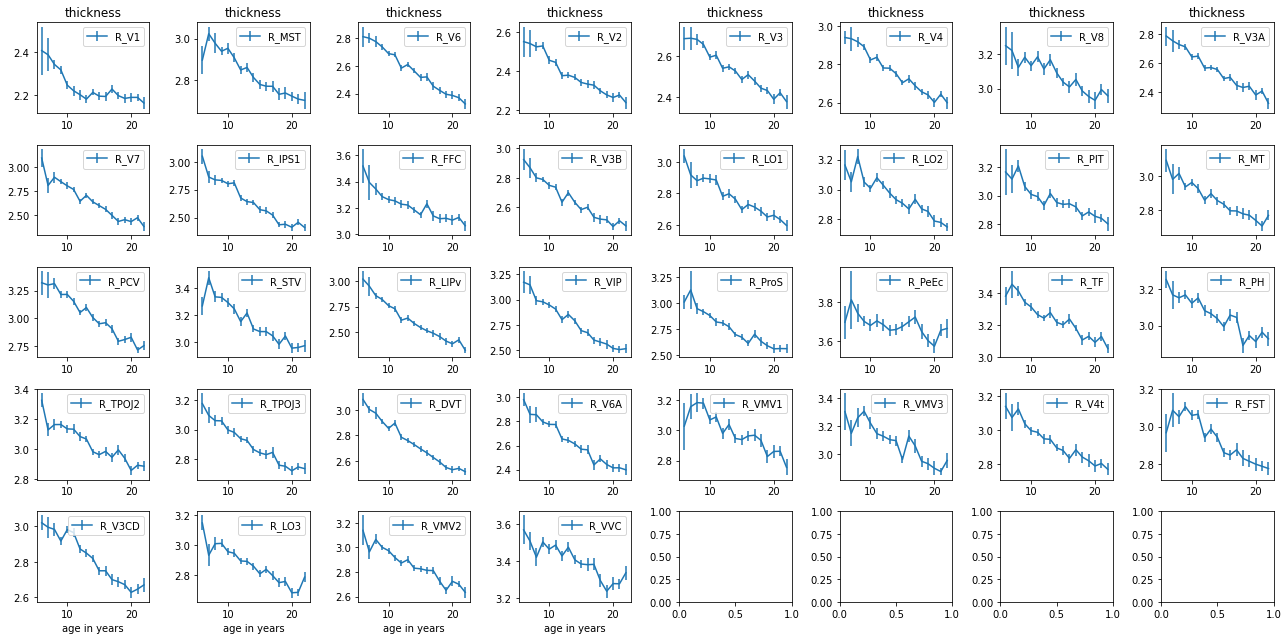

In [4]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPD_thickness_4mm_HCP_MMP1.csv'),
    info_file=dataset_name2info['HCPD'],
    columns=rois, age_name='age in years',
    n_row=5, n_col=8, title='thickness', figsize=(18, 9),
    out_file=pjoin(work_dir, 'HCPD_thickness_4mm_R_cole_visual_ROI_age-year.jpg')
)

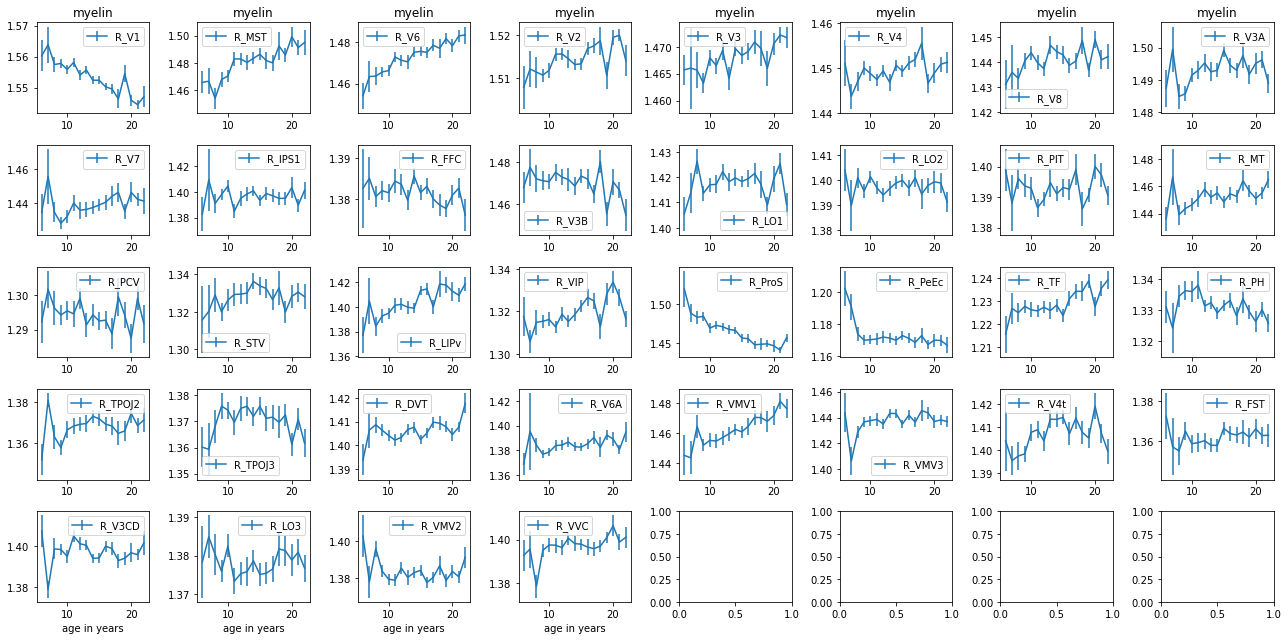

In [5]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPD_myelin_4mm_HCP_MMP1.csv'),
    info_file=dataset_name2info['HCPD'],
    columns=rois, age_name='age in years',
    n_row=5, n_col=8, title='myelin', figsize=(18, 9),
    out_file=pjoin(work_dir, 'HCPD_myelin_4mm_R_cole_visual_ROI_age-year.jpg')
)

## Cole_visual_LR

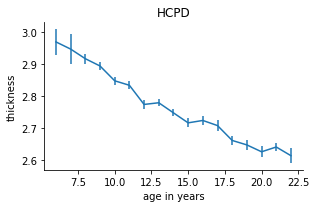

In [4]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPD_thickness_Cole_visual_LR.csv'),
    info_file=dataset_name2info['HCPD'],
    columns=['R_cole_visual'], age_name='age in years',
    n_row=1, n_col=1, figsize=(4.5, 3), ylabel='thickness',
    title='HCPD', legend=False,
    out_file=pjoin(work_dir, 'HCPD_thickness_R_cole_visual.jpg')
)

/nfs/s2/userhome/chenxiayu/.local/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/nfs/s2/userhome/chenxiayu/.local/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


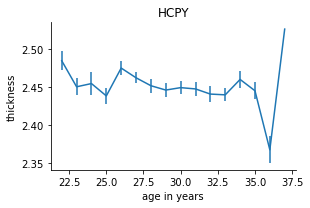

In [5]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPY_thickness_Cole_visual_LR.csv'),
    info_file=dataset_name2info['HCPY'],
    columns=['R_cole_visual'], age_name='age in years',
    n_row=1, n_col=1, figsize=(4.5, 3), ylabel='thickness',
    title='HCPY', legend=False,
    out_file=pjoin(work_dir, 'HCPY_thickness_R_cole_visual.jpg')
)

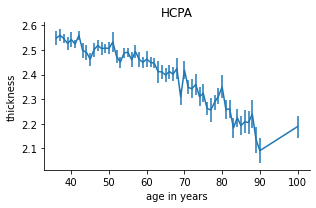

In [6]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPA_thickness_Cole_visual_LR.csv'),
    info_file=dataset_name2info['HCPA'],
    columns=['R_cole_visual'], age_name='age in years',
    n_row=1, n_col=1, figsize=(4.5, 3), ylabel='thickness',
    title='HCPA', legend=False,
    out_file=pjoin(work_dir, 'HCPA_thickness_R_cole_visual.jpg')
)

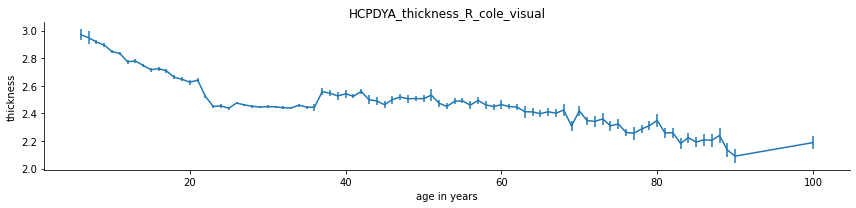

In [9]:
plot_column(
    data_file=[
        pjoin(anal_dir, 'structure/HCPD_thickness_Cole_visual_LR.csv'),
        pjoin(anal_dir, 'structure/HCPY_thickness_Cole_visual_LR.csv'),
        pjoin(anal_dir, 'structure/HCPA_thickness_Cole_visual_LR.csv')
    ],
    info_file=[
        dataset_name2info['HCPD'],
        dataset_name2info['HCPY'],
        dataset_name2info['HCPA']
    ],
    columns=['R_cole_visual'], age_name='age in years',
    n_row=1, n_col=1, figsize=(12, 3), ylabel='thickness',
    title='HCPDYA_thickness_R_cole_visual', legend=False,
    out_file=pjoin(work_dir, 'HCPDYA_thickness_R_cole_visual.jpg')
)

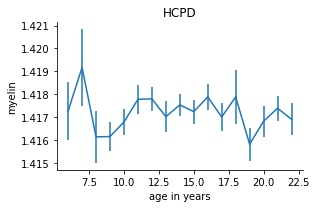

In [10]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPD_myelin_Cole_visual_LR.csv'),
    info_file=dataset_name2info['HCPD'],
    columns=['R_cole_visual'], age_name='age in years',
    n_row=1, n_col=1, figsize=(4.5, 3), ylabel='myelin',
    title='HCPD', legend=False,
    out_file=pjoin(work_dir, 'HCPD_myelin_R_cole_visual.jpg')
)

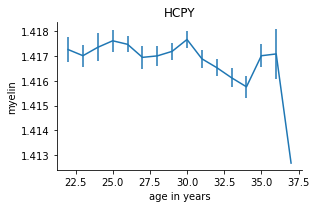

In [11]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPY_myelin_Cole_visual_LR.csv'),
    info_file=dataset_name2info['HCPY'],
    columns=['R_cole_visual'], age_name='age in years',
    n_row=1, n_col=1, figsize=(4.5, 3), ylabel='myelin',
    title='HCPY', legend=False,
    out_file=pjoin(work_dir, 'HCPY_myelin_R_cole_visual.jpg')
)

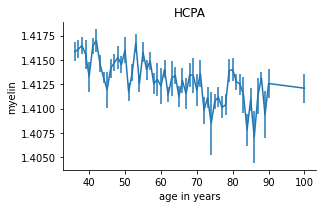

In [12]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPA_myelin_Cole_visual_LR.csv'),
    info_file=dataset_name2info['HCPA'],
    columns=['R_cole_visual'], age_name='age in years',
    n_row=1, n_col=1, figsize=(4.5, 3), ylabel='myelin',
    title='HCPA', legend=False,
    out_file=pjoin(work_dir, 'HCPA_myelin_R_cole_visual.jpg')
)

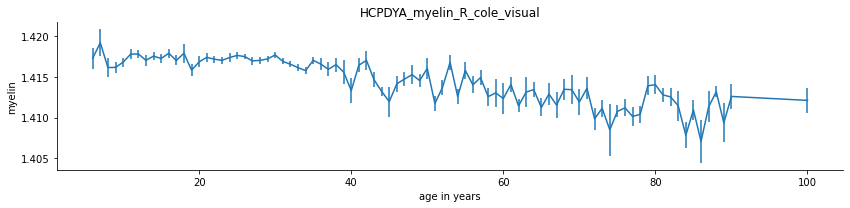

In [13]:
plot_column(
    data_file=[
        pjoin(anal_dir, 'structure/HCPD_myelin_Cole_visual_LR.csv'),
        pjoin(anal_dir, 'structure/HCPY_myelin_Cole_visual_LR.csv'),
        pjoin(anal_dir, 'structure/HCPA_myelin_Cole_visual_LR.csv')
    ],
    info_file=[
        dataset_name2info['HCPD'],
        dataset_name2info['HCPY'],
        dataset_name2info['HCPA']
    ],
    columns=['R_cole_visual'], age_name='age in years',
    n_row=1, n_col=1, figsize=(12, 3), ylabel='myelin',
    title='HCPDYA_myelin_R_cole_visual', legend=False,
    out_file=pjoin(work_dir, 'HCPDYA_myelin_R_cole_visual.jpg')
)

## FFA

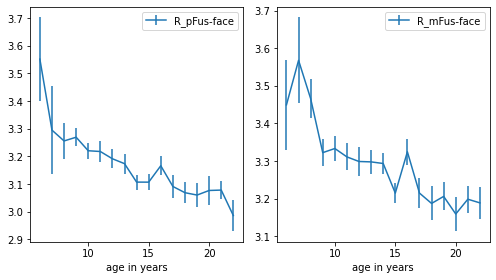

In [13]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPD_thickness_4mm_FFA.csv'),
    info_file=dataset_name2info['HCPD'],
    columns=['R_pFus-face', 'R_mFus-face'], age_name='age in years',
    n_row=1, n_col=2, title='thickness', figsize=(7, 4),
    out_file=pjoin(work_dir, 'HCPD_thickness_4mm_rFFA_age-year.jpg')
)

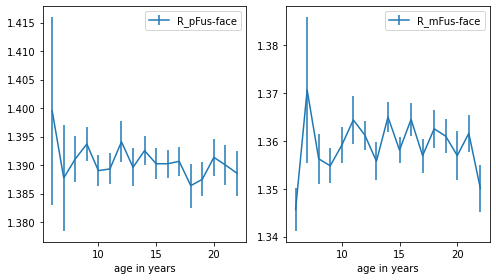

In [14]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPD_myelin_4mm_FFA.csv'),
    info_file=dataset_name2info['HCPD'],
    columns=['R_pFus-face', 'R_mFus-face'], age_name='age in years',
    n_row=1, n_col=2, title='myelin', figsize=(7, 4),
    out_file=pjoin(work_dir, 'HCPD_myelin_4mm_rFFA_age-year.jpg')
)

## thickness map-corr s1200 avg

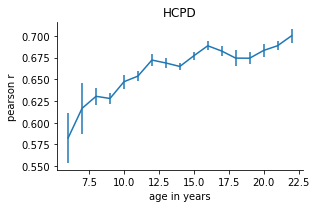

In [9]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPD_thickness_map-corr_s1200-avg_R_cole_visual.csv'),
    info_file=dataset_name2info['HCPD'],
    columns=['s1200_avg'], age_name='age in years',
    n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPD', legend=False,
    out_file=pjoin(work_dir, 'HCPD_thickness_map-corr_s1200-avg_R_cole_visual.jpg')
)

/nfs/s2/userhome/chenxiayu/.local/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/nfs/s2/userhome/chenxiayu/.local/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


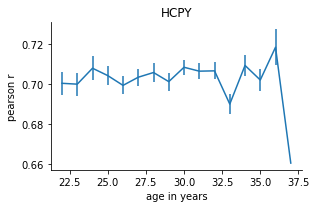

In [10]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPY_thickness_map-corr_s1200-avg_R_cole_visual.csv'),
    info_file=dataset_name2info['HCPY'],
    columns=['s1200_avg'], age_name='age in years',
    n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPY', legend=False,
    out_file=pjoin(work_dir, 'HCPY_thickness_map-corr_s1200-avg_R_cole_visual.jpg')
)

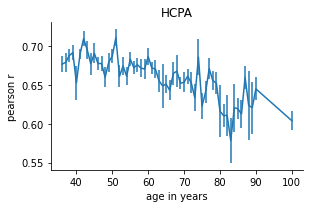

In [11]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPA_thickness_map-corr_s1200-avg_R_cole_visual.csv'),
    info_file=dataset_name2info['HCPA'],
    columns=['s1200_avg'], age_name='age in years',
    n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPA', legend=False,
    out_file=pjoin(work_dir, 'HCPA_thickness_map-corr_s1200-avg_R_cole_visual.jpg')
)

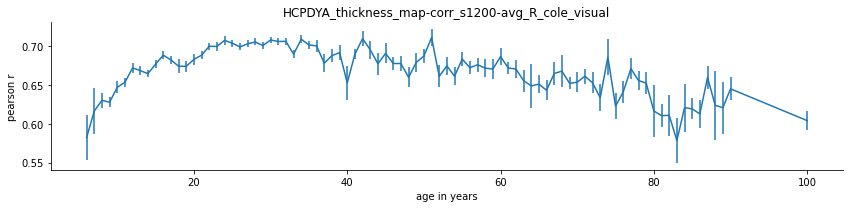

In [21]:
plot_column(
    data_file=[
        pjoin(anal_dir, 'structure/HCPD_thickness_map-corr_s1200-avg_R_cole_visual.csv'),
        pjoin(anal_dir, 'structure/HCPY_thickness_map-corr_s1200-avg_R_cole_visual.csv'),
        pjoin(anal_dir, 'structure/HCPA_thickness_map-corr_s1200-avg_R_cole_visual.csv')
    ],
    info_file=[
        dataset_name2info['HCPD'],
        dataset_name2info['HCPY'],
        dataset_name2info['HCPA']
    ],
    columns=['s1200_avg'], age_name='age in years',
    n_row=1, n_col=1, figsize=(12, 3), ylabel='pearson r',
    title='HCPDYA_thickness_map-corr_s1200-avg_R_cole_visual', legend=False,
    out_file=pjoin(work_dir, 'HCPDYA_thickness_map-corr_s1200-avg_R_cole_visual.jpg')
)

## myelin map-corr s1200 avg

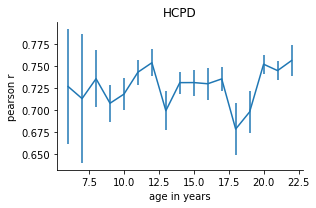

In [13]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPD_myelin_map-corr_s1200-avg_R_cole_visual.csv'),
    info_file=dataset_name2info['HCPD'],
    columns=['s1200_avg'], age_name='age in years',
    n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPD', legend=False,
    out_file=pjoin(work_dir, 'HCPD_myelin_map-corr_s1200-avg_R_cole_visual.jpg')
)

/nfs/s2/userhome/chenxiayu/.local/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/nfs/s2/userhome/chenxiayu/.local/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


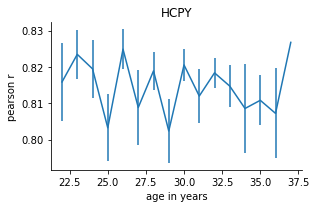

In [14]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPY_myelin_map-corr_s1200-avg_R_cole_visual.csv'),
    info_file=dataset_name2info['HCPY'],
    columns=['s1200_avg'], age_name='age in years',
    n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPY', legend=False,
    out_file=pjoin(work_dir, 'HCPY_myelin_map-corr_s1200-avg_R_cole_visual.jpg')
)

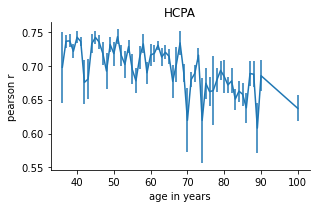

In [15]:
plot_column(
    data_file=pjoin(anal_dir, 'structure/HCPA_myelin_map-corr_s1200-avg_R_cole_visual.csv'),
    info_file=dataset_name2info['HCPA'],
    columns=['s1200_avg'], age_name='age in years',
    n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPA', legend=False,
    out_file=pjoin(work_dir, 'HCPA_myelin_map-corr_s1200-avg_R_cole_visual.jpg')
)

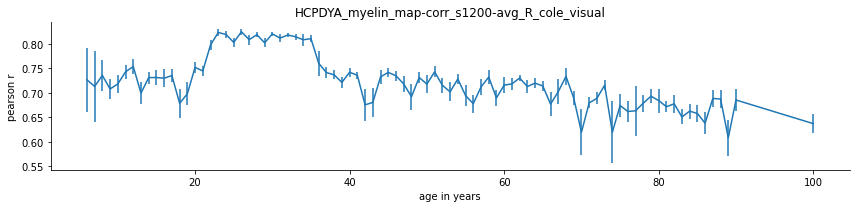

In [20]:
plot_column(
    data_file=[
        pjoin(anal_dir, 'structure/HCPD_myelin_map-corr_s1200-avg_R_cole_visual.csv'),
        pjoin(anal_dir, 'structure/HCPY_myelin_map-corr_s1200-avg_R_cole_visual.csv'),
        pjoin(anal_dir, 'structure/HCPA_myelin_map-corr_s1200-avg_R_cole_visual.csv')
    ],
    info_file=[
        dataset_name2info['HCPD'],
        dataset_name2info['HCPY'],
        dataset_name2info['HCPA']
    ],
    columns=['s1200_avg'], age_name='age in years',
    n_row=1, n_col=1, figsize=(12, 3), ylabel='pearson r',
    title='HCPDYA_myelin_map-corr_s1200-avg_R_cole_visual', legend=False,
    out_file=pjoin(work_dir, 'HCPDYA_myelin_map-corr_s1200-avg_R_cole_visual.jpg')
)

# plot_column_by_index

## thickness age-map map-corr s1200 avg

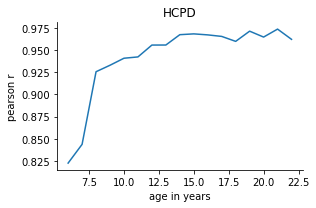

In [12]:
plot_column_by_index(
    data_file=pjoin(anal_dir, 'structure/HCPD_thickness_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
    columns=['s1200_avg'], n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPD', legend=False,
    out_file=pjoin(work_dir, 'HCPD_thickness_age-map_map-corr_s1200-avg_R_cole_visual.jpg')
)

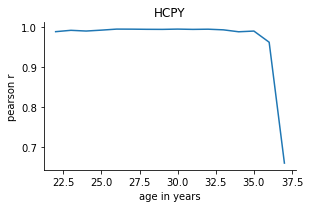

In [16]:
plot_column_by_index(
    data_file=pjoin(anal_dir, 'structure/HCPY_thickness_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
    columns=['s1200_avg'], n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPY', legend=False,
    out_file=pjoin(work_dir, 'HCPY_thickness_age-map_map-corr_s1200-avg_R_cole_visual.jpg')
)

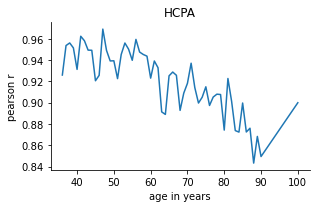

In [17]:
plot_column_by_index(
    data_file=pjoin(anal_dir, 'structure/HCPA_thickness_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
    columns=['s1200_avg'], n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPA', legend=False,
    out_file=pjoin(work_dir, 'HCPA_thickness_age-map_map-corr_s1200-avg_R_cole_visual.jpg')
)

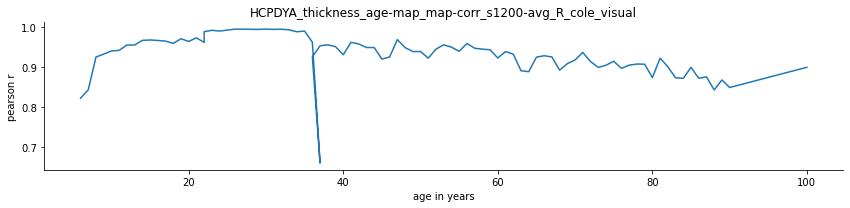

In [28]:
plot_column_by_index(
    data_file=[
        pjoin(anal_dir, 'structure/HCPD_thickness_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
        pjoin(anal_dir, 'structure/HCPY_thickness_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
        pjoin(anal_dir, 'structure/HCPA_thickness_age-map_map-corr_s1200-avg_R_cole_visual.csv')
    ],
    columns=['s1200_avg'], n_row=1, n_col=1, figsize=(12, 3), ylabel='pearson r',
    title='HCPDYA_thickness_age-map_map-corr_s1200-avg_R_cole_visual', legend=False,
    out_file=pjoin(work_dir, 'HCPDYA_thickness_age-map_map-corr_s1200-avg_R_cole_visual.jpg')
)

## myelin age-map map-corr s1200 avg

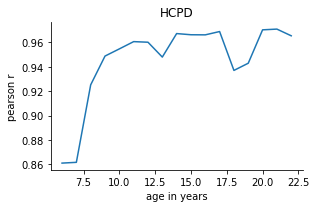

In [18]:
plot_column_by_index(
    data_file=pjoin(anal_dir, 'structure/HCPD_myelin_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
    columns=['s1200_avg'], n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPD', legend=False,
    out_file=pjoin(work_dir, 'HCPD_myelin_age-map_map-corr_s1200-avg_R_cole_visual.jpg')
)

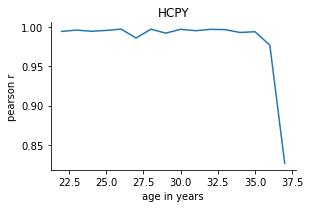

In [19]:
plot_column_by_index(
    data_file=pjoin(anal_dir, 'structure/HCPY_myelin_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
    columns=['s1200_avg'], n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPY', legend=False,
    out_file=pjoin(work_dir, 'HCPY_myelin_age-map_map-corr_s1200-avg_R_cole_visual.jpg')
)

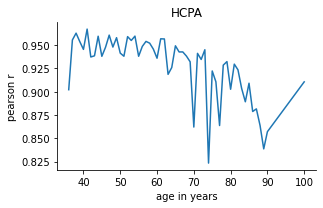

In [20]:
plot_column_by_index(
    data_file=pjoin(anal_dir, 'structure/HCPA_myelin_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
    columns=['s1200_avg'], n_row=1, n_col=1, figsize=(4.5, 3), ylabel='pearson r',
    title='HCPA', legend=False,
    out_file=pjoin(work_dir, 'HCPA_myelin_age-map_map-corr_s1200-avg_R_cole_visual.jpg')
)

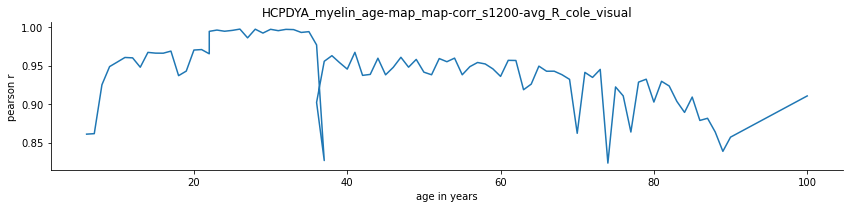

In [33]:
plot_column_by_index(
    data_file=[
        pjoin(anal_dir, 'structure/HCPD_myelin_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
        pjoin(anal_dir, 'structure/HCPY_myelin_age-map_map-corr_s1200-avg_R_cole_visual.csv'),
        pjoin(anal_dir, 'structure/HCPA_myelin_age-map_map-corr_s1200-avg_R_cole_visual.csv')
    ],
    columns=['s1200_avg'], n_row=1, n_col=1, figsize=(12, 3), ylabel='pearson r',
    title='HCPDYA_myelin_age-map_map-corr_s1200-avg_R_cole_visual', legend=False,
    out_file=pjoin(work_dir, 'HCPDYA_myelin_age-map_map-corr_s1200-avg_R_cole_visual.jpg')
)